# Import Libraries

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Python libraries
#Classic,data manipulation 
import numpy as np
import pandas as pd
# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,accuracy_score
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from xgboost import XGBClassifier
from xgboost import XGBRegressor
# Dataprep
# Modeling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.combine import SMOTEENN #resampling
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Import pipeline to allow you to do multiple steps at once
from imblearn.pipeline import Pipeline, make_pipeline


# Load Dataset 

In [3]:
df= pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')


# Explore Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.shape

(253680, 22)

In [6]:
df.sample(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
195653,0.0,1.0,1.0,1.0,38.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,8.0,3.0,0.0,0.0,10.0,6.0,8.0
98337,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,8.0,5.0,6.0
8550,0.0,0.0,1.0,1.0,38.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,4.0,20.0,30.0,1.0,0.0,8.0,4.0,2.0
225051,2.0,1.0,0.0,1.0,36.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,3.0,0.0,0.0,1.0,0.0,10.0,3.0,4.0
212998,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3.0,0.0,10.0,0.0,0.0,4.0,5.0,4.0
103126,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,10.0,0.0,0.0,3.0,6.0,7.0
35199,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,2.0,0.0,0.0,1.0,9.0,6.0,7.0
7662,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,5.0
243536,0.0,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,0.0,12.0,5.0,7.0
214004,0.0,0.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,3.0,0.0,0.0,7.0,6.0,8.0


In [7]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
# to rename the some columns important of dataset
df.rename(columns={'Diabetes_012': 'Diabetes_Type'}, inplace=True)
df.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Cleaning Dataset

In [9]:
df.isna().sum() # No missing value

Diabetes_Type           0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
df.BMI.unique()

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       55., 49., 42., 17., 16., 41., 44., 50., 59., 48., 52., 46., 54.,
       57., 53., 14., 15., 51., 58., 63., 61., 56., 74., 62., 64., 66.,
       73., 85., 60., 67., 65., 70., 82., 79., 92., 68., 72., 88., 96.,
       13., 81., 71., 75., 12., 77., 69., 76., 87., 89., 84., 95., 98.,
       91., 86., 83., 80., 90., 78.])

Would you say that in general your health is:scale 1-5:
> 1 = excellent 

> 2 = very good 

> 3 = good 

> 4 = fair 

> 5 = poor


In [11]:
df.GenHlth.unique()

array([5., 3., 2., 4., 1.])

Mental health scale:

> scale 1-30 days .

In [12]:
df.MentHlth.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1.,  4.,
        7.,  8., 21., 14., 26., 29., 16., 28., 11., 12., 24., 17., 13.,
       27., 19., 22.,  9., 23.])

Now thinking about your physical health, for how many days during the past 30 days 
was your physical health not good?

> scale 1-30 days 

In [13]:
df.PhysHlth.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 12., 25., 27., 21., 22.,  8., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

13-level age categorys:(_AGEG5YR see codebook)
> 1 = 18-24 

> 9 = 60-64 

> 13 = 80 or older 


In [14]:
df.Age.unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

Education level (EDUCA see codebook) scale 1-6:
> 1 = Never attended school or only kindergarten 

> 2 = Grades 1 through 8 (Elementary)

> 3 = Grades 9 throug 11 (Some high school)

> 4 = Grade 12 or GED (High school graduate)

> 5 = College 1 year to 3 years (Some college or technical school) 

> 6 = College 4 years or more (College graduate)

In [15]:
df.Education.unique()

array([4., 6., 3., 5., 2., 1.])

Income scale 1-8:
> 1 = less than $10,000 

> 5 = less than $35,000 

> 8 = $75,000 or more



In [16]:
df.Income.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [17]:
df.Diabetes_Type.unique()

array([0., 2., 1.])

In [18]:
Diabetes=df['Diabetes_Type']
Diabetes.value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_Type, dtype: int64

In [19]:
df['Diabetes_Type'].replace({2.0: 1.0},inplace = True)

# preprocessing

# Visualze the correlation 

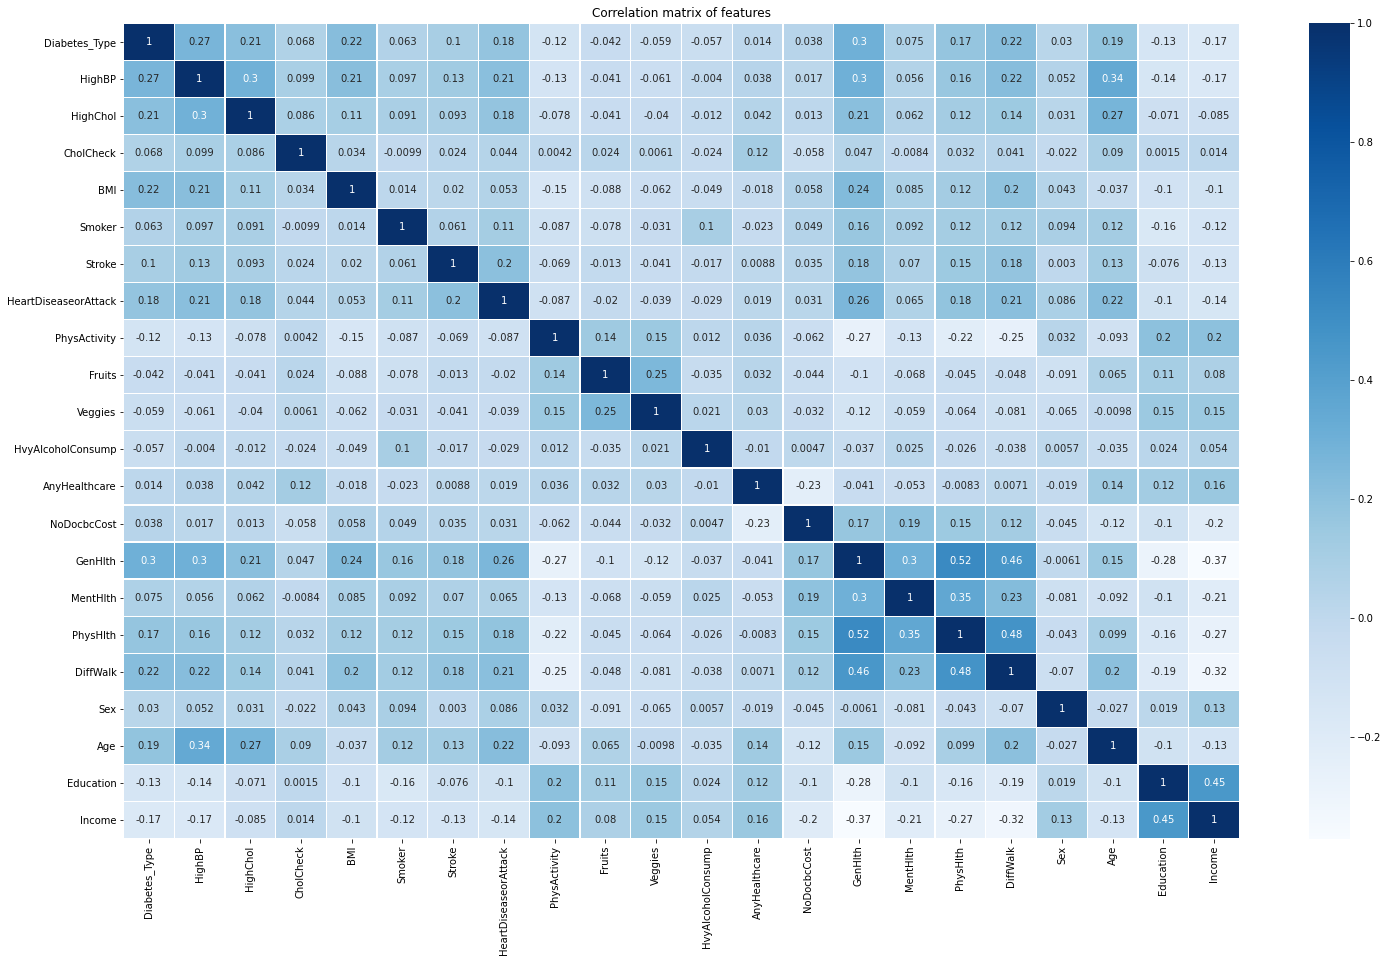

In [20]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.title("Correlation matrix of features")
plt.show()

In [21]:
df['Diabetes_Type'] = df['Diabetes_Type'].astype('int')

In [22]:
df['Diabetes']=df['Diabetes_Type']

In [23]:
df['Diabetes'] = df['Diabetes_Type'].map({0:'No Diabetes', 1:'Diabetes'})

In [24]:
Diabetes=df['Diabetes_Type']
Diabetes.value_counts()

0    213703
1     39977
Name: Diabetes_Type, dtype: int64

In [25]:
diabetes_bp = df.groupby(['Diabetes_Type', 'HighBP']).size().reset_index(name = 'Count')
print(diabetes_bp)

   Diabetes_Type  HighBP   Count
0              0     0.0  134391
1              0     1.0   79312
2              1     0.0   10460
3              1     1.0   29517


In [26]:
df.columns


Index(['Diabetes_Type', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes'],
      dtype='object')

In [27]:
df['GH']=df['GenHlth']

In [28]:
df['GH'] = df['GH'].map({1:5, 2:4 ,3:3 ,4:2 , 5:1})

In [29]:
df.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes,GH
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,No Diabetes,1
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,No Diabetes,3
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,No Diabetes,1
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,No Diabetes,4
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,No Diabetes,4


In [30]:
df.isna().sum()

Diabetes_Type           0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
GH                      0
dtype: int64

# Build models

## Experiment 1: Split data to training,validation and test set

In [31]:
smaller_df=df.loc[:,['Diabetes_Type', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack','PhysActivity', 'GenHlth','MentHlth','DiffWalk', 'Age']]
smaller_df1=df.loc[:,['Diabetes_Type', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack','PhysActivity', 'GH','MentHlth','DiffWalk', 'Age']]                  
                


In [32]:
df_train, df_test = train_test_split(smaller_df, test_size=0.20, random_state=0)
df_train, df_val = train_test_split(df_train, test_size=0.20, random_state=0)

x,y = df_train.drop(['Diabetes_Type'],axis=1),df_train['Diabetes_Type']


## Baseline Model

In [33]:
# The figure above display the correlation between the features and the target, for this i choose only these features
x_train1,y_train = df_train.drop(['Diabetes_Type'],axis=1),df_train['Diabetes_Type']
x_val1,y_val = df_val.drop(['Diabetes_Type'],axis=1),df_val['Diabetes_Type']
x_test1,y_test= df_test.drop(['Diabetes_Type'],axis=1),df_test['Diabetes_Type']

In [34]:
print(x_train1.shape)
print(x_val1.shape)
print(x_test1.shape)

(162355, 9)
(40589, 9)
(50736, 9)


## Scalling to give us fair distrubtion btw features

In [35]:
#For smaller df1
scaler = MinMaxScaler()
scaler.fit(x_train1)

x_train = scaler.transform(x_train1)
x_test= scaler.transform(x_test1)
x_val=scaler.transform(x_val1)

## Experiment 1-1: K-nearest Neighbors Classification without using cross vaidation

In [36]:
# create a dict to store the scores of each model
models_evalutions = {'Model':[],
                     'Accuracy':[],
                     'Precision':[],
                     'Recall':[], 
                     'F1 score':[]}

In [37]:
#model_names = ["knn_final", "lr_final","Dt_final","rf_final"]
#model_vars = [eval(n) for n in model_names]
#model_list = list(zip(model_names, model_vars))

In [38]:
x0_train=x_train.copy()
x0_val=x_val.copy()

In [39]:
# Using KNN (smaller df1) train on training set, and Test on testing set 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x0_train, y_train)
print("The score for kNN without cross val and without using smote is")
print("Training set: {:6.2f}%".format(100*knn.score(x0_train, y_train)))
print("Validation set: {:6.2f}%".format(100*knn.score(x0_val, y_val)))
print("Test set: {:6.2f}%".format(100*knn.score(x_test, y_test)))

The score for kNN without cross val and without using smote is
Training set:  86.50%
Validation set:  82.73%
Test set:  82.87%


In [40]:
#test the baseline model for smaller df
#prediction
val_pred=knn.predict(x0_val)
#Accuracy
confusion_hard = confusion_matrix( y_val, val_pred)
accuracy = accuracy_score(y_val , val_pred)
precision = precision_score(y_val , val_pred)
recall = recall_score(y_val , val_pred)
f1 = f1_score(y_val,val_pred) 
print('\nKNN Accuracy for validation set=: {0:.4f}, \nprecision: {1:.4f}, \nrecall: {2:.4f},\
\nF1: {3:.4f}'.format(accuracy, precision, recall, f1))


KNN Accuracy for validation set=: 0.8273, 
precision: 0.4116, 
recall: 0.2381,
F1: 0.3017


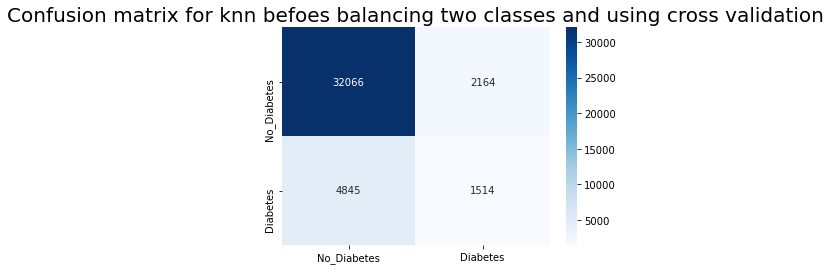

In [41]:
cm = confusion_matrix(y_val, val_pred)
class_label = ["No_Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d",  cmap = "Blues" )
plt.title('Confusion matrix for knn befoes balancing two classes and using cross validation', fontsize = 20); # title with fontsize 20

## Experiment 1-2: K-nearest Neighbors Classification with cross validation & Smote

Becouse of our target's labels imbalance we will use Smote to balance them with cross validation.

In [42]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
accuracy_score1=[]
f1_score1 = []
percision_score1 = []
recall_score1 = []

# enumerate the splits and summarize the distributions
for train_ix, test_ix in kf.split(x, y):
    # select rows
    train_x, test_X = x.iloc[train_ix], x.iloc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
    #print(train_X.shape, train_y.shape)
    #print(test_X.shape, test_y.shape)
    oversample = SMOTE(random_state = 0)
    train_x, train_y = oversample.fit_resample(train_x, train_y)
    #scores= cross_val_score(knn, test_X, test_y, cv=5, scoring='accuracy') 
    knn.fit(train_x, train_y)
    y_pred =knn.predict(test_X)
    #score = f1_score(test_y,y_pred)
    accuracy_score1.append(metrics.accuracy_score(test_y, y_pred))
    percision_score1.append(metrics.precision_score(test_y, y_pred))
    recall_score1.append(metrics.recall_score(test_y, y_pred))
    f1_score1.append(metrics.f1_score(test_y, y_pred))


    
print("kNN accuracy score: \t")
print(sum(accuracy_score1) / len(accuracy_score1))
print("----------------")    
print("kNN score: \t")
print(sum(f1_score1) / len(f1_score1))
print("----------------")
conf_mat3 = confusion_matrix(test_y, y_pred)
print("kNN confusion matrix: \n",conf_mat3)
print("----------------")
print("KNN precision score")
print(sum(percision_score1) / len(percision_score1))
print("----------------")
print("KNN recall_score")
print(sum(recall_score1) / len(recall_score1))
print("----------------")
#print score for all evaluations


kNN accuracy score: 	
0.7458778602445258
----------------
kNN score: 	
0.4004600764791174
----------------
kNN confusion matrix: 
 [[21330  6087]
 [ 2269  2785]]
----------------
KNN precision score
0.3181433579825833
----------------
KNN recall_score
0.5404380412656264
----------------


In [47]:
models_evalutions['Model'].append("KNN after balance our target's labels")
models_evalutions['Accuracy'].append(accuracy_score(test_y, y_pred))
models_evalutions['Precision'].append(precision_score(test_y, y_pred))
models_evalutions['Recall'].append(recall_score(test_y, y_pred))
models_evalutions['F1 score'].append(f1_score(test_y, y_pred))

In [48]:
knn_final = knn.n_neighbors

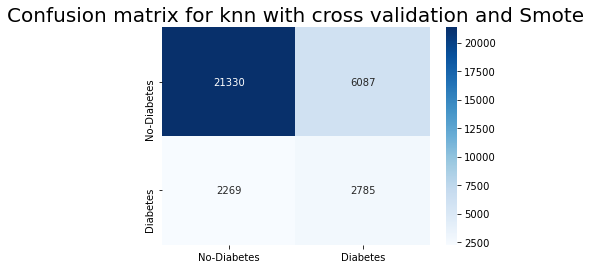

In [49]:
cm =confusion_matrix(test_y, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for knn with cross validation and Smote', fontsize = 20); # title with fontsize 20

## Expreiment 2: Logistic Regression Model with smote

In [50]:
x2_train=x_train.copy()
x2_val=x_val.copy()

In [51]:
#Before balance classes
lr=LogisticRegression()
prams ={"penalty": [ 'l1', 'l2'],
       "C": [0.5 , 0.7,0.8 , 1 , 2.0 , 3.0]}

lr_cv= GridSearchCV(lr , param_grid=prams, n_jobs=-1 ,cv=10)
lr_cv.fit(x2_train , y_train )

print("Best params: ", lr_cv.best_params_)
print("Best estimator: " ,lr_cv.best_estimator_)
print("Best score: ", lr_cv.best_score_)

print("Training Score before balance the labels:",lr_cv.score(x2_train, y_train))
print("Validation Score before balance the labels:",lr_cv.score(x2_val, y_val))

y_pred = lr_cv.predict(x2_val)
print("\nLogistic Regression Accuracy=",accuracy_score(y_val, y_pred))
print("Logistic Regression F1 score=",f1_score(y_val, y_pred))

Best params:  {'C': 1, 'penalty': 'l2'}
Best estimator:  LogisticRegression(C=1)
Best score:  0.8473838154695909
Training Score before balance the labels: 0.8473961380924517
Validation Score before balance the labels: 0.846781147601567

Logistic Regression Accuracy= 0.846781147601567
Logistic Regression F1 score= 0.2524341868012982


In [52]:
lr_cv.best_score_

0.8473838154695909

In [53]:
lr_final = lr_cv.best_estimator_
lr_final

LogisticRegression(C=1)

In [54]:
lr_final.score(x2_train , y_train)

0.8473961380924517

In [55]:
lr_final.score(x_val , y_val)

0.846781147601567

The Class Imbalance classification divided into three:

> 1. Before model training: Resampling strategies (oversampling, undersampling)

> 2. During model training: Training with adjusted class weights

> 3. After model training: Adjusting the decision threshold (F1 optimization strategy)

In [56]:
#experiment2-1 with random over sampling
lg1 = LogisticRegression(C=1,penalty="l2")

# randomly oversample positive samples
ROS = RandomOverSampler(random_state=42)

X_tr_rs, y_tr_rs = ROS.fit_resample(x2_train, y_train)

lg1.fit(X_tr_rs, y_tr_rs)
print("Training Score after balance the labels (RandomOverSampler):",lg1.score(X_tr_rs, y_tr_rs))
print("Validation Score after balance the labels (RandomOverSampler)",lg1.score(x_val, y_val))
#model_eval(model3,X_test_std,y_test)

Training Score after balance the labels (RandomOverSampler): 0.7392441690536038
Validation Score after balance the labels (RandomOverSampler) 0.7257138633619946


In [57]:
#experiment2-2 whith random under sampling
lg2 = LogisticRegression(C=1,penalty="l2")

RUS = RandomUnderSampler(random_state=42)

X_tr_us, y_tr_us = RUS.fit_resample(x2_train, y_train)

lg2.fit(X_tr_us, y_tr_us)
print("Training Score after balance the labels (RandomUnderSampler)",lg2.score(X_tr_us, y_tr_us))
print("Validation Score after balance the labels (RandomUnderSampler):",lg2.score(x2_val, y_val))
#model_eval(lg2,X_test_std,y_test)

Training Score after balance the labels (RandomUnderSampler) 0.7389505470802776
Validation Score after balance the labels (RandomUnderSampler): 0.7259848727487743


In [58]:
#experiment2-3 whith balanced weighted classes sampling
lg3 = LogisticRegression(C=1,penalty="l2",class_weight='balanced')

lg3.fit(x2_train, y_train)
#y_pred=lg3.predict(x2_val)
print("Training Score after Balanced class weights Logistic Regression",lg3.score(x2_train, y_train))
print("Validation Score after Balanced class weights Logistic Regression:",lg3.score(x2_val, y_val))


Training Score after Balanced class weights Logistic Regression 0.7280712019956269
Validation Score after Balanced class weights Logistic Regression: 0.7256399517110547


In [59]:
#experiment2-4 whith Smote
lg = LogisticRegression(C=1,penalty="l2")

SMT = SMOTE(random_state=42)

X_tr_smt, y_tr_smt = SMT.fit_resample(x2_train, y_train)

lg.fit(X_tr_smt, y_tr_smt)
y_pred=lg.predict(x2_val)

print("Training Score after balance the labels (Smote):",lg.score(X_tr_smt, y_tr_smt))
print("Validation Score after balance the labels (Smote):",lg.score(x2_val, y_val))
#model_eval(model3,X_test_std,y_test)

Training Score after balance the labels (Smote): 0.7411220552990004
Validation Score after balance the labels (Smote): 0.7249254724186356


the best result was for Smote 

In [60]:
# classification report for logisitic
print(classification_report(y_val, y_pred, digits=3, zero_division = 1))
acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred, average="binary")
print("ACCURACY:",accuracy_score(y_val, y_pred))
print("RECALL:",recall_score(y_val, y_pred, average="binary"))

              precision    recall  f1-score   support

           0      0.939     0.720     0.815     34230
           1      0.332     0.749     0.460      6359

    accuracy                          0.725     40589
   macro avg      0.636     0.735     0.638     40589
weighted avg      0.844     0.725     0.760     40589

ACCURACY: 0.7249254724186356
RECALL: 0.7493316559207422


In [61]:
models_evalutions['Model'].append("LogisticRegression with Smote")
models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
models_evalutions['Precision'].append(precision_score(y_val, y_pred))
models_evalutions['Recall'].append(recall_score(y_val, y_pred))
models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

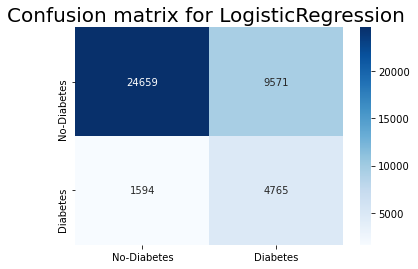

In [62]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for LogisticRegression ', fontsize = 20); # title with fontsize 20

## Experiment 3: Decision Tree Classification

In [63]:
x3_train=x_train.copy()
x3_val=x_val.copy()

In [64]:
# finding the best parameters for the decision tree
param_grid = {'criterion' :['gini', 'entropy'],'max_depth': [4, 6, 10, 12]}

tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True, scoring = 'f1')
grid_search.fit(x3_train, y_train)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)


In [65]:
Dt_final = grid_search.best_estimator_
Dt_final

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [66]:
# trying with entropy, since it didn't show in the previose step
tree = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=10,
                                     max_features='auto',
                                     random_state=42)

tree.fit(x3_train,y_train)

print("Training Score In Decision Tree Classification:",tree.score(x3_train, y_train))
print("Validation Score In Decision Tree: Classification",tree.score(x2_val, y_val))
y_pred = tree.predict(x3_val)

print("DT Accuracy=",accuracy_score(y_val, y_pred))
print("DT F1 score=",f1_score(y_val, y_pred))

Training Score In Decision Tree Classification: 0.8528594746081118
Validation Score In Decision Tree: Classification 0.8477912734977457
DT Accuracy= 0.8477912734977457
DT F1 score= 0.24529684827754702


In [67]:
# classification report for Decision Tree 
print(classification_report(y_val, y_pred, digits=3, zero_division = 1))
acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred, average="binary")
print("ACCURACY:",accuracy_score(y_val, y_pred))
print("RECALL:",recall_score(y_val, y_pred, average="binary"))

              precision    recall  f1-score   support

           0      0.862     0.976     0.915     34230
           1      0.550     0.158     0.245      6359

    accuracy                          0.848     40589
   macro avg      0.706     0.567     0.580     40589
weighted avg      0.813     0.848     0.810     40589

ACCURACY: 0.8477912734977457
RECALL: 0.15788646013524138


In [68]:
models_evalutions['Model'].append("Decision Tree Classification")
models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
models_evalutions['Precision'].append(precision_score(y_val, y_pred))
models_evalutions['Recall'].append(recall_score(y_val, y_pred))
models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

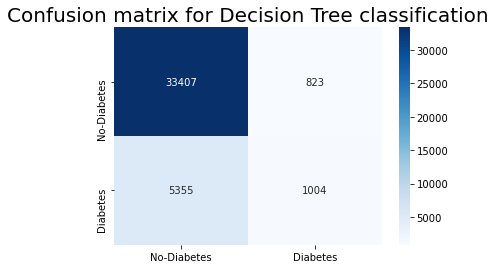

In [69]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Decision Tree classification', fontsize = 20); # title with fontsize 20

## Expreiment 5: Random Forest Classification 

In [70]:
x5_train=x_train.copy()
x5_val=x_val.copy()

In [71]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

In [72]:
#kf = KFold(n_splits=5, random_state=42, shuffle=False)
example_params = {
        'n_estimators': 50,
        'max_depth':4 ,
        'random_state': 13
    }
    

In [73]:
imba_pipeline = make_pipeline(SMOTE(random_state=42),RandomForestClassifier(n_estimators=5, random_state=13))
cross_val_score(imba_pipeline, x5_train, y_train, scoring='f1', cv=kf)

array([0.38011393, 0.38131033, 0.37633013, 0.37975118, 0.38690323])

In [74]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='f1',return_train_score=True)
grid_imba.fit(x5_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_estimators=5,
                                                               random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='f1')

In [75]:
print("Training Score In Random Forest Classification:",grid_imba.score(x5_train, y_train))
print("Validation Score In Random Forest Classification:",grid_imba.score(x5_val, y_val))

Training Score In Random Forest Classification: 0.49778063686072693
Validation Score In Random Forest Classification: 0.46517875594131014


In [76]:
rf_best=grid_imba.best_params_
rf_best

{'randomforestclassifier__max_depth': 12,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__random_state': 13}

In [77]:
# Random Forest with best hyperparameter
rf_best = RandomForestClassifier(n_estimators=100,
                                 max_depth=12,
                                 random_state=13)
rf_best.fit(x5_train, y_train)
y_pred = rf_best.predict(x5_val)


In [78]:
print("Training Score In Random Forest Classification with best parameters:",rf_best.score(x5_train, y_train))
print("Validation Score In Random Forest Classification:with best parameters",rf_best.score(x5_val, y_val))

Training Score In Random Forest Classification with best parameters: 0.8636444827692402
Validation Score In Random Forest Classification:with best parameters 0.8488753110448644


In [79]:
# classification report for Random forest 
print(classification_report(y_val, y_pred, digits=3, zero_division = 1))
acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred, average="binary")
print("ACCURACY:",accuracy_score(y_val, y_pred))
print("RECALL:",recall_score(y_val, y_pred, average="binary"))

              precision    recall  f1-score   support

           0      0.863     0.976     0.916     34230
           1      0.561     0.164     0.253      6359

    accuracy                          0.849     40589
   macro avg      0.712     0.570     0.585     40589
weighted avg      0.815     0.849     0.812     40589

ACCURACY: 0.8488753110448644
RECALL: 0.16370498506054412


In [80]:
models_evalutions['Model'].append("RandomForestClassifier_best parameters")
models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
models_evalutions['Precision'].append(precision_score(y_val, y_pred))
models_evalutions['Recall'].append(recall_score(y_val, y_pred))
models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

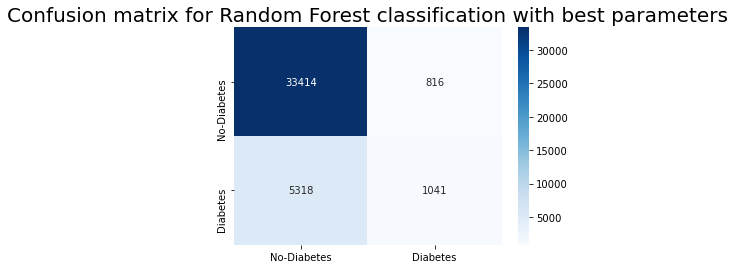

In [81]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues');
plt.title('Confusion matrix for Random Forest classification with best parameters', fontsize = 20); # title with fontsize 20

## Experiment 6-1: Ensembling with Voting

In [82]:
x6_train=x_train.copy()
x6_val=x_val.copy()

In [83]:
model_names = ["rf_best","Dt_final"]

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [84]:
model_names

['rf_best', 'Dt_final']

In [85]:
model_list

[('rf_best', RandomForestClassifier(max_depth=12, random_state=13)),
 ('Dt_final',
  DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42))]

In [86]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(x_val, y_val)}')

rf_best score: 0.8488753110448644
Dt_final score: 0.8455739239695484


In [87]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,voting='hard', n_jobs=-1)
voting_classifer.fit(x6_train, y_train)

VotingClassifier(estimators=[('rf_best',
                              RandomForestClassifier(max_depth=12,
                                                     random_state=13)),
                             ('Dt_final',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     random_state=42))],
                 n_jobs=-1)

In [88]:
# get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_classifer.predict(x_val)

In [89]:
print("Training Score In Hard Voting and select the best model scores(DT& RF))",voting_classifer.score(x6_train, y_train))
print("Training Score In HRD Voting and select the best model scores(DT& RF))",voting_classifer.score(x6_val, y_val))

Training Score In Hard Voting and select the best model scores(DT& RF)) 0.8584952727048751
Training Score In HRD Voting and select the best model scores(DT& RF)) 0.8492448692995639


In [90]:
# classification report for Voting 
print(classification_report(y_val, y_pred, digits=3, zero_division = 1))
acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred, average="binary")
print("ACCURACY:",accuracy_score(y_val, y_pred))
print("RECALL:",recall_score(y_val, y_pred, average="binary"))

              precision    recall  f1-score   support

           0      0.861     0.980     0.916     34230
           1      0.573     0.148     0.235      6359

    accuracy                          0.849     40589
   macro avg      0.717     0.564     0.576     40589
weighted avg      0.816     0.849     0.810     40589

ACCURACY: 0.8492448692995639
RECALL: 0.14782198458877183


In [91]:
models_evalutions['Model'].append("VotingClassifier-Hard")
models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
models_evalutions['Recall'].append(recall_score(y_val, y_pred))
models_evalutions['Precision'].append(precision_score(y_val, y_pred))
models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

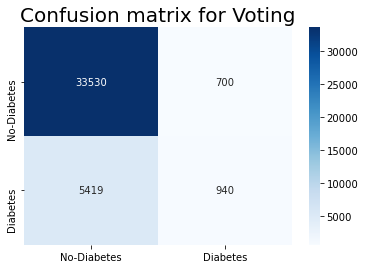

In [92]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Voting', fontsize = 20); # title with fontsize 20

## Experiment 6-2: Ensembling with Average Voting

In [93]:
x7_train=x_train.copy()
x7_val=x_val.copy()

In [94]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,voting='soft', n_jobs=-1)
voting_classifer.fit(x7_train, y_train)

VotingClassifier(estimators=[('rf_best',
                              RandomForestClassifier(max_depth=12,
                                                     random_state=13)),
                             ('Dt_final',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     random_state=42))],
                 n_jobs=-1, voting='soft')

In [95]:
print("Training Score In Average Voting and select the best model scores(DT& RF))",voting_classifer.score(x7_train, y_train))
print("Training Score In Avaerage Voting and select the best model scores(DT& RF))",voting_classifer.score(x7_val, y_val))

Training Score In Average Voting and select the best model scores(DT& RF)) 0.8603061193064581
Training Score In Avaerage Voting and select the best model scores(DT& RF)) 0.8477666362807658


In [96]:
# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_classifer.predict(x7_val)

In [97]:
# classification report for voting avarage
print(classification_report(y_val, y_pred, digits=3, zero_division = 1))
acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred, average="binary")
print("ACCURACY:",accuracy_score(y_val, y_pred))
print("RECALL:",recall_score(y_val, y_pred, average="binary"))

              precision    recall  f1-score   support

           0      0.864     0.972     0.915     34230
           1      0.544     0.177     0.267      6359

    accuracy                          0.848     40589
   macro avg      0.704     0.575     0.591     40589
weighted avg      0.814     0.848     0.813     40589

ACCURACY: 0.8477666362807658
RECALL: 0.17675735178487184


In [98]:
models_evalutions['Model'].append("VotingClassifier-Average Voting")
models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
models_evalutions['Recall'].append(recall_score(y_val, y_pred))
models_evalutions['Precision'].append(precision_score(y_val, y_pred))
models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

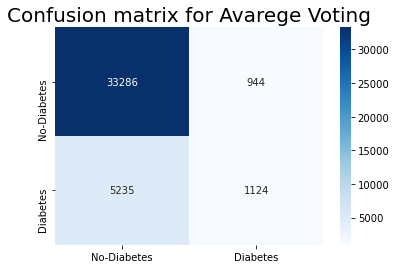

In [99]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Avarege Voting', fontsize = 20); # title with fontsize 20

## Experiment 6-3: Ensembling with Weighted Voting

In [100]:
x8_train=x_train.copy()
x8_val=x_val.copy()

In [101]:
# create voting classifier
weights = [1.5,3.8]
voting_model = VotingClassifier(estimators=model_list, voting='soft', weights = weights, n_jobs=-1)
voting_model.fit(x8_train, y_train)

VotingClassifier(estimators=[('rf_best',
                              RandomForestClassifier(max_depth=12,
                                                     random_state=13)),
                             ('Dt_final',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     random_state=42))],
                 n_jobs=-1, voting='soft', weights=[1.5, 3.8])

In [102]:
# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_model.predict(x8_val)

In [103]:
print("Training Score In Weighted Voting and select the best model scores(DT& RF))",voting_model.score(x7_train, y_train))
print("Training Score In Weighted Voting and select the best model scores(DT& RF))",voting_model.score(x7_val, y_val))

Training Score In Weighted Voting and select the best model scores(DT& RF)) 0.8577068769055465
Training Score In Weighted Voting and select the best model scores(DT& RF)) 0.8465347754317673


In [104]:
# classification report for Naive Bayes
print(classification_report(y_val, y_pred, digits=3, zero_division = 1))
acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred, average="binary")
print("ACCURACY:",accuracy_score(y_val, y_pred))
print("RECALL:",recall_score(y_val, y_pred, average="binary"))

              precision    recall  f1-score   support

           0      0.866     0.968     0.914     34230
           1      0.528     0.192     0.282      6359

    accuracy                          0.847     40589
   macro avg      0.697     0.580     0.598     40589
weighted avg      0.813     0.847     0.815     40589

ACCURACY: 0.8465347754317673
RECALL: 0.1920113225349898


In [105]:
models_evalutions['Model'].append("VotingClassifier-Weighted Voting")
models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
models_evalutions['Recall'].append(recall_score(y_val, y_pred))
models_evalutions['Precision'].append(precision_score(y_val, y_pred))
models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

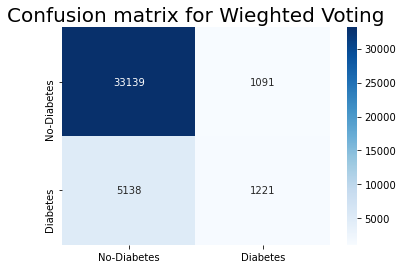

In [106]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Wieghted Voting', fontsize = 20); # title with fontsize 20

# Expreiment 7: Bagging

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
tree_clas = DecisionTreeClassifier(random_state=42)

In [108]:
bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score=True,
    random_state = 0
)

In [109]:
bag_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [110]:
bag_model.oob_score_

0.8310246065720182

In [111]:
bag_model.score(x_val,y_val)

0.8293133607627683

In [112]:
y_pred = tree.predict(x_val)

print("DT Accuracy=",accuracy_score(y_val, y_pred))
print("DT F1 score=",f1_score(y_val, y_pred))

DT Accuracy= 0.8477912734977457
DT F1 score= 0.24529684827754702


In [113]:
# classification report Baggin
print(classification_report(y_val, y_pred, digits=3, zero_division = 1))
acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred, average="binary")
print("ACCURACY:",accuracy_score(y_val, y_pred))
print("RECALL:",recall_score(y_val, y_pred, average="binary"))

              precision    recall  f1-score   support

           0      0.862     0.976     0.915     34230
           1      0.550     0.158     0.245      6359

    accuracy                          0.848     40589
   macro avg      0.706     0.567     0.580     40589
weighted avg      0.813     0.848     0.810     40589

ACCURACY: 0.8477912734977457
RECALL: 0.15788646013524138


In [114]:
models_evalutions['Model'].append(" BaggingClassifier")
models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
models_evalutions['Recall'].append(recall_score(y_val, y_pred))
models_evalutions['Precision'].append(precision_score(y_val, y_pred))
models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

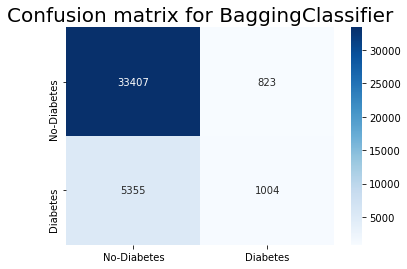

In [115]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for BaggingClassifier', fontsize = 20); # title with fontsize 20

# Expreiment 8 : Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [117]:
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Naive Bayes val score: ",nb.score(x_val,y_val))
print("Naive Bayes Train score: ",nb.score(x_train,y_train))
y_pred_nb = nb.predict(x_val)

Naive Bayes val score:  0.7901894601985759
Naive Bayes Train score:  0.7905638877767854


In [118]:
y_pred=nb.predict(x_val)

In [119]:
# classification report for Naive Bayes
print(classification_report(y_val, y_pred, digits=3, zero_division = 1))
acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred, average="binary")
print("ACCURACY:",accuracy_score(y_val, y_pred))
print("RECALL:",recall_score(y_val, y_pred, average="binary"))

              precision    recall  f1-score   support

           0      0.897     0.848     0.872     34230
           1      0.369     0.478     0.416      6359

    accuracy                          0.790     40589
   macro avg      0.633     0.663     0.644     40589
weighted avg      0.815     0.790     0.801     40589

ACCURACY: 0.7901894601985759
RECALL: 0.47790533102689103


In [120]:
models_evalutions['Model'].append("Naive-B")
models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
models_evalutions['Precision'].append(precision_score(y_val, y_pred))
models_evalutions['Recall'].append(recall_score(y_val, y_pred))
models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

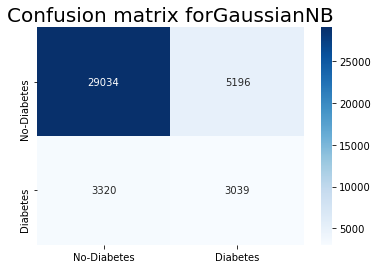

In [121]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix forGaussianNB', fontsize = 20); # title with fontsize 20

In [124]:
result= pd.DataFrame.from_dict(models_evalutions)
result

,Model,Accuracy,Precision,Recall,F1 score
0,KNN after balance our target's labels,0.742663,0.313909,0.551049,0.399971
1,LogisticRegression with Smote,0.724925,0.332380,0.749332,0.460498
2,Decision Tree Classification,0.847791,0.549535,0.157886,0.245297
3,RandomForestClassifier_best parameters,0.848875,0.560582,0.163705,0.253408
4,VotingClassifier-Hard,0.849245,0.573171,0.147822,0.235029
5,VotingClassifier-Average Voting,0.847767,0.543520,0.176757,0.266762
6,VotingClassifier-Weighted Voting,0.846535,0.528114,0.192011,0.281628
7,BaggingClassifier,0.847791,0.549535,0.157886,0.245297
8,Naive-B,0.790189,0.369035,0.477905,0.416473


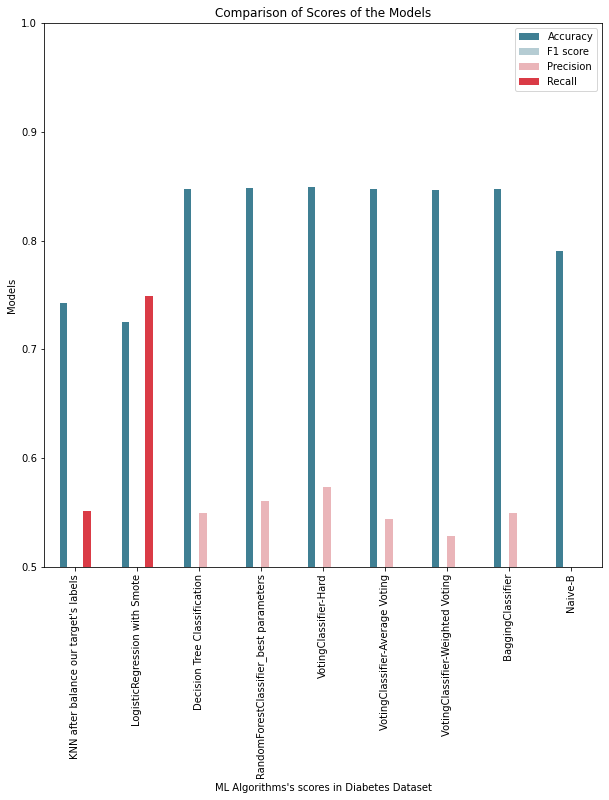

In [126]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
result.plot.bar(x='Model',y=['Accuracy','F1 score','Precision','Recall'], cmap=cmap, figsize=(10,10))
plt.title("Comparison of Scores of the Models")
plt.ylabel("Models")
plt.ylim(0.50, 1.0)
plt.xlabel("ML Algorithms's scores in Diabetes Dataset")
plt.show()